In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# invert pulses false, 500 trigger delay, 170 trigger threshold
f_name = 'data/test7.h5'
f_data = h5py.File(f_name,'r')
raw_data0 = f_data['raw_data'][()]

# invert pulses false, 500 trigger delay, 120 trigger threshold
f_name = 'data/test0.h5'
f_data = h5py.File(f_name,'r')
raw_data1 = f_data['raw_data'][()]
raw_data1.shape


(2223, 50000)

In [3]:
raw_data0.shape

(177, 50000)

## plot all pulses

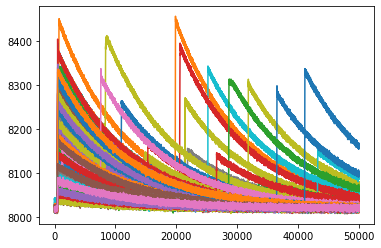

In [3]:
# plot all pulses
# last week
plt.figure()
for i in range(len(raw_data0)):
    plt.plot(raw_data0[i])
plt.show()

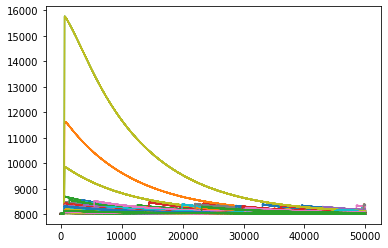

In [4]:
# plot all pulses
# test 0
plt.figure()
for i in range(len(raw_data1)):
    plt.plot(raw_data1[i])
plt.show()

## plot downsampled pulses

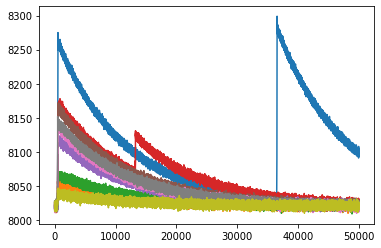

In [5]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data0))
    plt.plot(raw_data0[n])
plt.show()

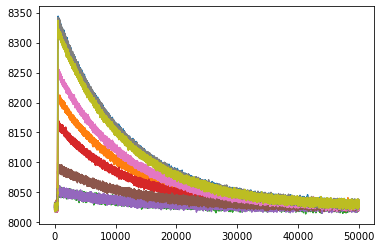

In [6]:
# plot random pulses
plt.figure()
for i in range(9):
    n = int(np.random.rand()*len(raw_data1))
    plt.plot(raw_data1[n])
plt.show()

## Single pulses

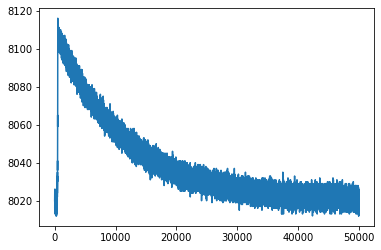

In [7]:
# plot single pulse
plt.figure()
plt.plot(raw_data0[0])
plt.show()

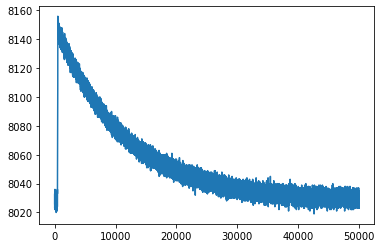

In [8]:
# plot single pulse
plt.figure()
plt.plot(raw_data1[0])
plt.show()